> Simulation Tables

# import

In [153]:
import pandas as pd

In [154]:
data_fivenodes = pd.read_csv('./simulation_results/Real_simulation_reshape/EvolveGCNO_fivedones_Simulation.csv')

In [155]:
data_chickenpox = pd.read_csv('./simulation_results/Real_simulation_reshape/EvolveGCNO_chikenpox_Simulation.csv')

In [156]:
data_pedal = pd.read_csv('./simulation_results/Real_simulation_reshape/EvolveGCNO_pedalme_Simulation.csv')

In [157]:
data_pedal2 = pd.read_csv('./simulation_results/Real_simulation_reshape/EvolveGCNO_pedalme_Simulation_itstgcnsnd.csv')

In [158]:
data__wiki = pd.read_csv('./simulation_results/Real_simulation_reshape/EvolveGCNO_wikimath.csv')

In [159]:
data_wiki_GSO = pd.read_csv('./simulation_results/Real_simulation_reshape/EvolveGCNO_wikimath_GSO_st.csv')

In [ ]:
data_windmillsmall = pd.read_csv('./simulation_results/Real_simulation_reshape/EvolveGCNO_windmillsmall.csv')

In [160]:
data_monte = pd.read_csv('./simulation_results/Real_simulation_reshape/EvolveGCNO_monte.csv')

In [ ]:
data = pd.concat([data_fivenodes,data_chickenpox,data_pedal,data__wiki,data_windmillsmall,data_monte]);data

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time
0,fivenodes,STGCN,0.700000,rand,2,12,linear,50,1.145873,10.957345
1,fivenodes,STGCN,0.700000,rand,2,12,nearest,50,1.094555,12.740510
2,fivenodes,IT-STGCN,0.700000,rand,2,12,linear,50,1.145589,19.806524
3,fivenodes,IT-STGCN,0.700000,rand,2,12,nearest,50,1.208142,17.870021
4,fivenodes,STGCN,0.700000,rand,2,12,linear,50,1.158356,12.736769
...,...,...,...,...,...,...,...,...,...,...
175,monte,IT-STGCN,0.149142,block,4,12,nearest,50,1.332833,177.727905
176,monte,STGCN,0.149142,block,4,12,nearest,50,1.817397,48.237467
177,monte,IT-STGCN,0.149142,block,4,12,nearest,50,1.412503,277.217018
178,monte,STGCN,0.149142,block,4,12,nearest,50,1.662510,80.834154


In [162]:
data.to_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_EvolveGCNO.csv',index=False)

In [163]:
pedal_wiki_GSO = pd.concat([data_pedal2,data_wiki_GSO])

In [164]:
pedal_wiki_GSO.to_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_EvolveGCNO_pedal_wiki_GSO.csv',index=False)

# Fivenodes

## Baseline

In [74]:
pd.merge(data.query("dataset=='fivenodes' and mtype!='rand' and mtype!='block'").groupby(['nof_filters','method','lags'])['mse'].mean().reset_index(),
         data.query("dataset=='fivenodes' and mtype!='rand' and mtype!='block'").groupby(['nof_filters','method','lags'])['mse'].std().reset_index(),
         on=['method','nof_filters','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,nof_filters,method,lags,mean,std
0,12,IT-STGCN,2,1.172,0.064
1,12,STGCN,2,1.164,0.065


## Random

In [75]:
pd.merge(data.query("dataset=='fivenodes' and mtype=='rand'").groupby(['mrate','nof_filters','method','lags'])['mse'].mean().reset_index(),
         data.query("dataset=='fivenodes' and mtype=='rand'").groupby(['mrate','nof_filters','method','lags'])['mse'].std().reset_index(),
         on=['method','nof_filters','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("nof_filters==12")

,mrate,nof_filters,method,lags,mean,std
0,0.7,12,IT-STGCN,2,1.173,0.048
1,0.7,12,STGCN,2,1.201,0.064
2,0.8,12,IT-STGCN,2,1.209,0.073
3,0.8,12,STGCN,2,1.216,0.058


## Block

In [76]:
pd.merge(data.query("dataset=='fivenodes' and mtype=='block'").groupby(['mrate','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='fivenodes' and mtype=='block'").groupby(['mrate','nof_filters','method'])['mse'].std().reset_index(),
         on=['method','nof_filters','mrate']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,nof_filters,method,mean,std
0,0.125,12,IT-STGCN,1.165,0.051
1,0.125,12,STGCN,1.185,0.061


# ChickenpoxDatasetLoader(lags=4)

## Baseline

In [129]:
pd.merge(data.query("dataset=='chickenpox' and mtype!='rand' and mtype!='block'").groupby(['nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='chickenpox' and mtype!='rand' and mtype!='block'").groupby(['nof_filters','method'])['mse'].std().reset_index(),
         on=['method','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,nof_filters,method,mean,std
0,32,IT-STGCN,0.984,0.016
1,32,STGCN,0.988,0.019


## Random

In [78]:
pd.merge(data.query("dataset=='chickenpox' and mtype=='rand'").groupby(['mrate','inter_method','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='chickenpox' and mtype=='rand'").groupby(['mrate','inter_method','nof_filters','method'])['mse'].std().reset_index(),
         on=['method','inter_method','mrate','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,inter_method,nof_filters,method,mean,std
0,0.3,linear,32,IT-STGCN,0.998,0.019
1,0.3,linear,32,STGCN,1.054,0.011
2,0.8,linear,32,IT-STGCN,1.161,0.054
3,0.8,linear,32,STGCN,1.234,0.096


## Block

In [79]:
pd.merge(data.query("dataset=='chickenpox' and mtype=='block'").groupby(['inter_method','mrate','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='chickenpox' and mtype=='block'").groupby(['inter_method','mrate','nof_filters','method'])['mse'].std().reset_index(),
         on=['method','inter_method','mrate','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'})

,inter_method,mrate,nof_filters,method,mean,std
0,linear,0.28777,32,IT-STGCN,1.002350,0.015102
1,linear,0.28777,32,STGCN,1.027605,0.015945
2,nearest,0.28777,32,IT-STGCN,0.998713,0.021721
3,nearest,0.28777,32,STGCN,1.025797,0.014844


# PedalMeDatasetLoader (lags=4)

## Baseline

In [80]:
pd.merge(data.query("dataset=='pedalme' and mtype!='rand' and mtype!='block'").groupby(['lags','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='pedalme' and mtype!='rand' and mtype!='block'").groupby(['lags','nof_filters','method'])['mse'].std().reset_index(),
         on=['method','lags','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,lags,nof_filters,method,mean,std
0,4,2,IT-STGCN,1.213,0.045
1,4,2,STGCN,1.234,0.055


## Random

In [81]:
pd.merge(data.query("dataset=='pedalme' and mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data.query("dataset=='pedalme' and mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,lags,inter_method,method,mean,std
0,0.3,4,linear,IT-STGCN,1.251,0.072
1,0.3,4,linear,STGCN,1.267,0.072
2,0.3,4,nearest,IT-STGCN,1.251,0.057
3,0.3,4,nearest,STGCN,1.265,0.056
4,0.6,4,linear,IT-STGCN,1.280,0.065
5,0.6,4,linear,STGCN,1.305,0.092
6,0.6,4,nearest,IT-STGCN,1.267,0.067
7,0.6,4,nearest,STGCN,1.292,0.075


## Block

In [82]:
pd.merge(data.query("dataset=='pedalme' and mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data.query("dataset=='pedalme' and mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,mrate,lags,inter_method,method,mean,std
0,0.286,4,linear,IT-STGCN,1.246,0.034
1,0.286,4,linear,STGCN,1.230,0.056
2,0.286,4,nearest,IT-STGCN,1.245,0.045
3,0.286,4,nearest,STGCN,1.246,0.035


## W_st

In [83]:
pd.merge(data_pedal2.query("mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data_pedal2.query("mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,mrate,lags,inter_method,method,mean,std
0,0.3,4,linear,IT-STGCN,1.223,0.041
1,0.3,4,linear,STGCN,1.263,0.048
2,0.3,4,nearest,IT-STGCN,1.234,0.046
3,0.3,4,nearest,STGCN,1.252,0.071
4,0.6,4,linear,IT-STGCN,1.269,0.092
5,0.6,4,linear,STGCN,1.304,0.061
6,0.6,4,nearest,IT-STGCN,1.248,0.072
7,0.6,4,nearest,STGCN,1.321,0.094


In [84]:
pd.merge(data_pedal2.query("mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data_pedal2.query("mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,mrate,lags,inter_method,method,mean,std
0,0.286,4,linear,IT-STGCN,1.204,0.033
1,0.286,4,linear,STGCN,1.210,0.058
2,0.286,4,nearest,IT-STGCN,1.211,0.033
3,0.286,4,nearest,STGCN,1.241,0.095


# WikiMathsDatasetLoader (lags=8)

## Baseline

In [85]:
pd.merge(data.query("dataset=='wikimath' and mrate==0").groupby(['lags','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='wikimath' and mrate==0").groupby(['lags','nof_filters','method'])['mse'].std().reset_index(),
         on=['lags','nof_filters','method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mean,lags,nof_filters,method,std


## Random

In [ ]:
pd.merge(data.query("dataset=='wikimath' and mtype=='rand'").groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='wikimath' and mtype=='rand'").groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

## Block

In [ ]:
pd.merge(data.query("dataset=='wikimath' and mtype=='block'").groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='wikimath' and mtype=='block'").groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'})

## missing values on the same nodes

In [ ]:
pd.merge(data_wiki_GSO.groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
        data_wiki_GSO.groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

# WindmillOutputSmallDatasetLoader (lags=8)

## Baseline

In [ ]:
pd.merge(data.query("dataset=='windmillsmall' and mrate==0").groupby(['lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='windmillsmall' and mrate==0").groupby(['lags','method'])['mse'].std().reset_index(),
         on=['method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

## Random

In [ ]:
pd.merge(data.query("dataset=='windmillsmall' and mtype=='rand'").groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='windmillsmall' and mtype=='rand'").groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

## Block

In [ ]:
pd.merge(data.query("dataset=='windmillsmall' and mtype=='block'").groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='windmillsmall' and mtype=='block'").groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

# Montevideobus (lags=4)

## Baseline

In [86]:
pd.merge(data.query("dataset=='monte' and mrate==0").groupby(['lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='monte' and mrate==0").groupby(['lags','method'])['mse'].std().reset_index(),
         on=['method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,lags,method,mean,std
0,4,IT-STGCN,1.317,0.118
1,4,STGCN,0.997,0.004


## Random

In [87]:
pd.merge(data.query("dataset=='monte' and mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data.query("dataset=='monte' and mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['mrate','inter_method','method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'})

,mrate,lags,inter_method,method,mean,std
0,0.8,4,nearest,IT-STGCN,2.263371,0.476410
1,0.8,4,nearest,STGCN,2.622998,0.693321


## Block

In [88]:
pd.merge(data.query("dataset=='monte' and mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data.query("dataset=='monte' and mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','inter_method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'})

,mrate,lags,inter_method,method,mean,std
0,0.149142,4,nearest,IT-STGCN,1.345316,0.110313
1,0.149142,4,nearest,STGCN,1.766133,0.123163


# Check

In [93]:
import itstgcnEvolveGCNO
import torch
import numpy as np
import pandas as pd

In [94]:
import matplotlib.pyplot as plt

In [95]:
import random

In [96]:
class Eval_csy:
    def __init__(self,learner,train_dataset):
        self.learner = learner
        # self.learner.model.eval()
        try:self.learner.model.eval()
        except:pass
        self.train_dataset = train_dataset
        self.lags = self.learner.lags
        rslt_tr = self.learner(self.train_dataset) 
        self.X_tr = rslt_tr['X']
        self.y_tr = rslt_tr['y']
        self.f_tr = torch.concat([self.train_dataset[0].x.T,self.y_tr],axis=0).float()
        self.yhat_tr = rslt_tr['yhat']
        self.fhat_tr = torch.concat([self.train_dataset[0].x.T,self.yhat_tr],axis=0).float()

In [97]:
from plotnine import *

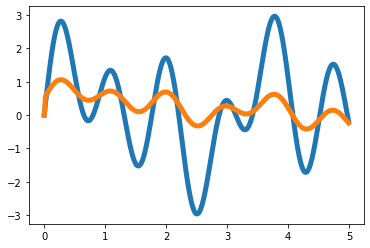

In [98]:
T = 500
t = np.arange(T)/T * 5

x = 1*np.sin(2*t)+np.sin(4*t)+1.5*np.sin(7*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')


In [99]:
loader1 = itstgcnEvolveGCNO.DatasetLoader(data_dict1)

In [130]:
dataset = loader1.get_dataset(lags=4)

mindex = itstgcn.rand_mindex(dataset,mrate=0)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [131]:
mindex = [random.sample(range(0, T), int(T*0.8)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcnEvolveGCNO.miss(dataset,mindex,mtype='block')

In [132]:
dataset_padded = itstgcnEvolveGCNO.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [133]:
lrnr = itstgcnEvolveGCNO.StgcnLearner(dataset_padded)

In [134]:
lrnr.learn(filters=16,epoch=5)

In [135]:
lrnr1 = itstgcnEvolveGCNO.ITStgcnLearner(dataset_padded)

In [136]:
lrnr1.learn(filters=16,epoch=5)

In [137]:
evtor = Eval_csy(lrnr,dataset_padded)

In [138]:
evtor1 = Eval_csy(lrnr1,dataset_padded)

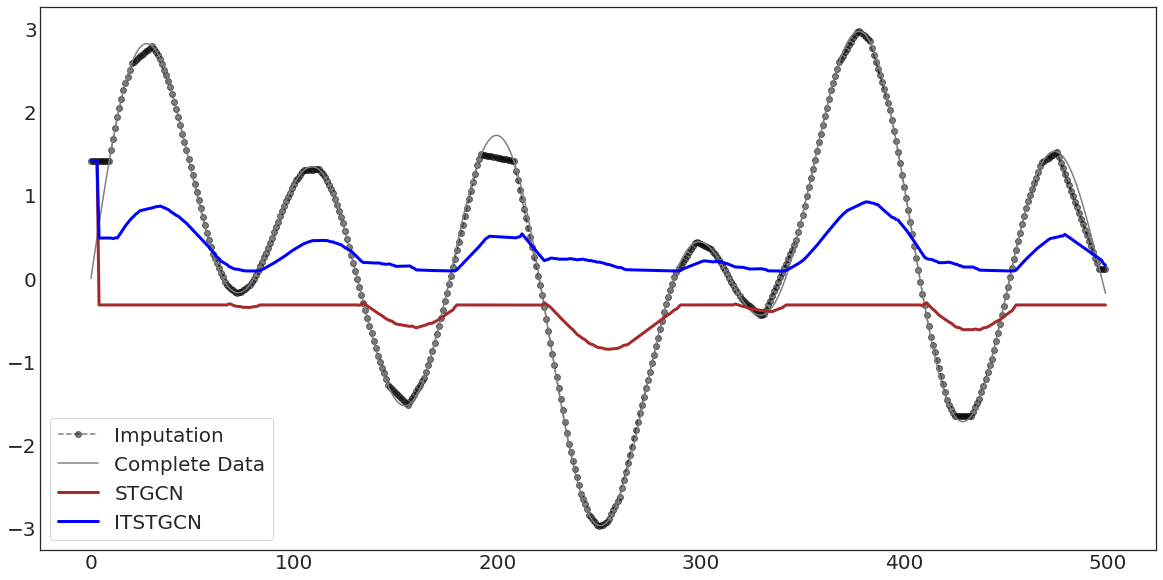

In [139]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

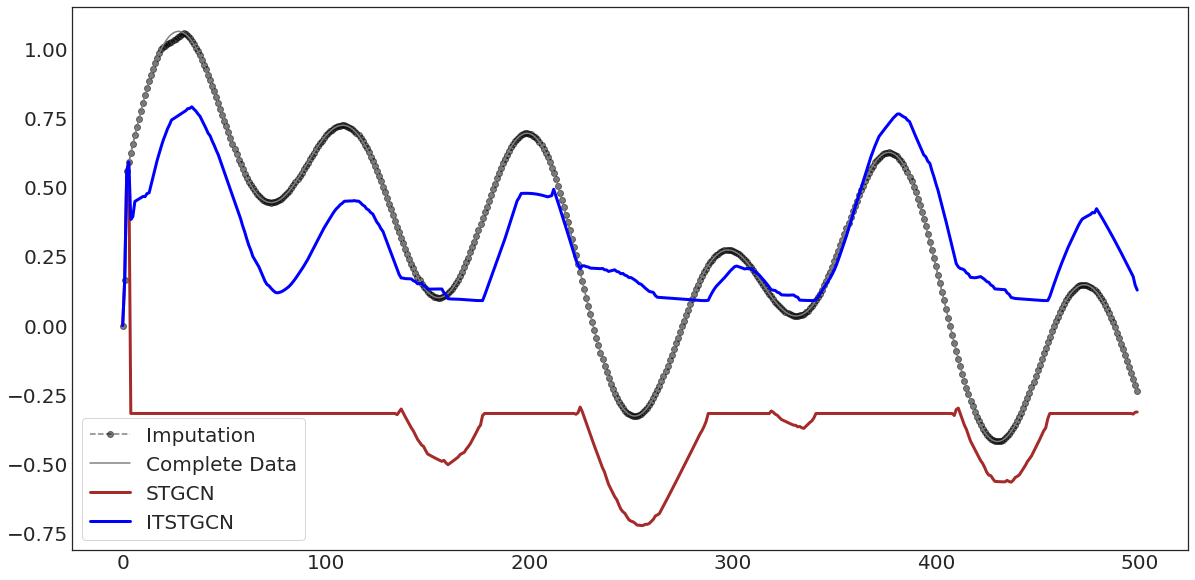

In [140]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

In [111]:
import itstgcnsnd
import torch
import numpy as np

In [112]:
loader1 = itstgcnsnd.DatasetLoader(data_dict1)

In [113]:
dataset = loader1.get_dataset(lags=2)

mindex = itstgcn.rand_mindex(dataset,mrate=0)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [114]:
mindex = [random.sample(range(0, T), int(T*0.5)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcnsnd.miss(dataset,mindex,mtype='block')

In [115]:
dataset_padded = itstgcnsnd.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [116]:
lrnr = itstgcnsnd.StgcnLearner(dataset_padded)

In [117]:
lrnr.learn(filters=32,epoch=5)

In [118]:
lrnr1 = itstgcnsnd.ITStgcnLearner(dataset_padded)

In [119]:
lrnr1.learn(filters=32,epoch=5)

In [120]:
evtor = Eval_csy(lrnr,dataset_padded)

In [121]:
evtor1 = Eval_csy(lrnr1,dataset_padded)

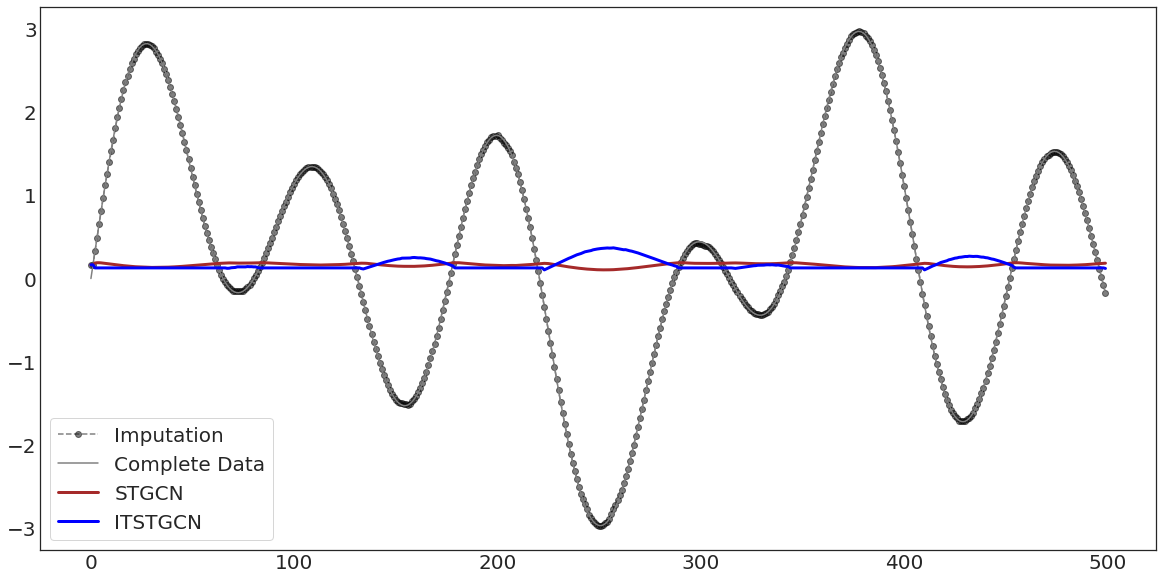

In [122]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

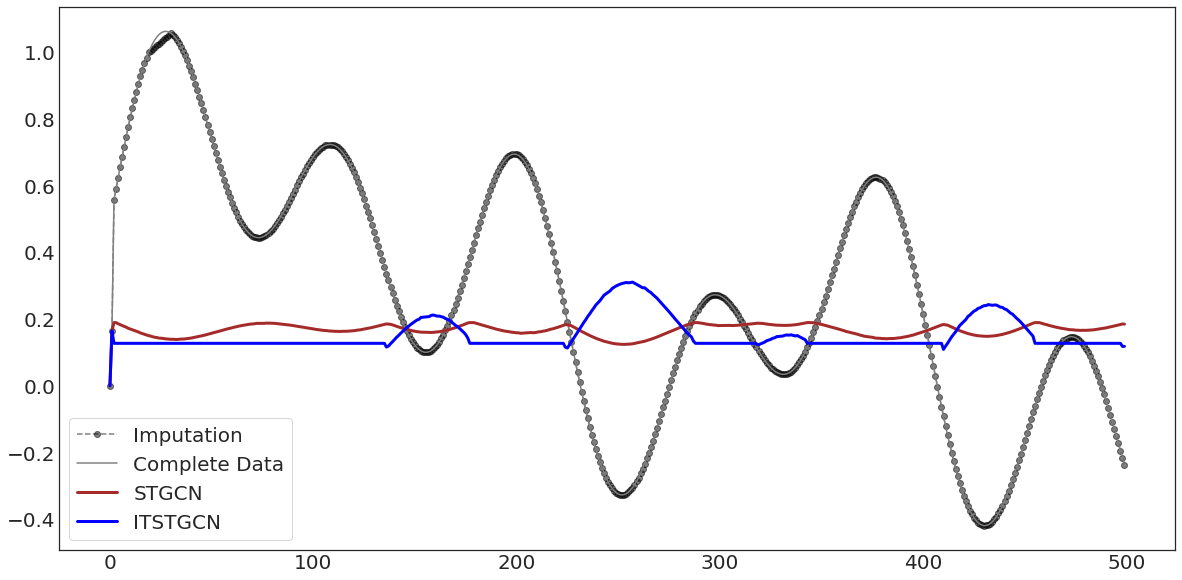

In [123]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

# hyperparameter 

In [ ]:
WindmillOutputSmallDatasetLoader()

In [19]:
import itstgcn

data_dict = itstgcn.load_data('./data/fivenodes.pkl')
loader = itstgcn.DatasetLoader(data_dict)

from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader
loader1 = ChickenpoxDatasetLoader()

from torch_geometric_temporal.dataset import PedalMeDatasetLoader
loader2 = PedalMeDatasetLoader()

from torch_geometric_temporal.dataset import WikiMathsDatasetLoader
loader3 = WikiMathsDatasetLoader()

# from torch_geometric_temporal.dataset import WindmillOutputSmallDatasetLoader
# loader6 = WindmillOutputSmallDatasetLoader()

from torch_geometric_temporal.dataset import MontevideoBusDatasetLoader
loader10 = MontevideoBusDatasetLoader()

In [20]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(iterable):
        return iterable

|Dataset|RecurrentGCN|Method|Missing Rate|Filters|Lags|Mean|SD|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|fivenodes|GConvGRU|IT-STGCN|0.7|12|2|1.167|0.059|
|fivenodes|GConvGRU|STGCN|0.7|12|2|2.077|0.252|
|chickenpox|GConvGRU|IT-STGCN|0.8|16|4|1.586|0.199|
|chickenpox|GConvGRU|STGCN|0.8|16|4|2.529|0.292|
|pedalme|GConvGRU|IT-STGCN|0.6|12|4|1.571|0.277|
|pedalme|GConvGRU|STGCN|0.6|12|4|1.753|0.239|
|wikimath|GConvGRU|IT-STGCN|0.8|12|8|0.687|0.021|
|wikimath|GConvGRU|STGCN|0.8|12|8|0.932|0.04|
|windmillsmall|GConvGRU|IT-STGCN|0.7|12|8|1.180|0.035|
|windmillsmall|GConvGRU|STGCN|0.7|12|8|1.636|0.088|
|monte|GConvGRU|IT-STGCN|0.8|12|4|1.096|0.019|
|monte|GConvGRU|STGCN|0.8|12|4|1.516|0.040|

In [54]:
EvolveGCNO?

Init signature:
EvolveGCNO(
    in_channels: int,
    improved: bool = False,
    cached: bool = False,
    normalize: bool = True,
    add_self_loops: bool = True,
)
Docstring:     
An implementation of the Evolving Graph Convolutional without Hidden Layer.
For details see this paper: `"EvolveGCN: Evolving Graph Convolutional
Networks for Dynamic Graph." <https://arxiv.org/abs/1902.10191>`_
Args:
    in_channels (int): Number of filters.
    improved (bool, optional): If set to :obj:`True`, the layer computes
        :math:`\mathbf{\hat{A}}` as :math:`\mathbf{A} + 2\mathbf{I}`.
        (default: :obj:`False`)
    cached (bool, optional): If set to :obj:`True`, the layer will cache
        the computation of :math:`\mathbf{\hat{D}}^{-1/2} \mathbf{\hat{A}}
        \mathbf{\hat{D}}^{-1/2}` on first execution, and will use the
        cached version for further executions.
        This parameter should only be set to :obj:`True` in transductive
        learning scenarios. (default: :obj:`

In [53]:
import torch
import torch.nn.functional as F
from torch_geometric_temporal.nn.recurrent import EvolveGCNO

# from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader
from torch_geometric_temporal.signal import temporal_signal_split

# loader1 = ChickenpoxDatasetLoader()

dataset = loader.get_dataset(lags=2)
dataset1 = loader1.get_dataset(lags=4)
dataset2 = loader2.get_dataset(lags=4)
dataset3 = loader3.get_dataset(lags=8)
# dataset6 = loader6.get_dataset(lags=8)
dataset10 = loader10.get_dataset(lags=4)

train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.2)
train_dataset1, test_dataset1 = temporal_signal_split(dataset1, train_ratio=0.2)
train_dataset2, test_dataset2 = temporal_signal_split(dataset2, train_ratio=0.2)
train_dataset3, test_dataset3 = temporal_signal_split(dataset3, train_ratio=0.2)
# train_dataset6, test_dataset6 = temporal_signal_split(dataset6, train_ratio=0.2)
train_dataset10, test_dataset10 = temporal_signal_split(dataset10, train_ratio=0.2)

In [40]:
# _a = itstgcn.load_data('./data/Windmillsmall.pkl')

In [41]:
dataset6 = _a.get_dataset(lags=8)

In [42]:
train_dataset6, test_dataset6 = temporal_signal_split(dataset6, train_ratio=0.2)

In [55]:
class RecurrentGCN(torch.nn.Module):
    def __init__(self, node_features):
        super(RecurrentGCN, self).__init__()
        self.recurrent = EvolveGCNO(node_features)
        self.linear = torch.nn.Linear(node_features, 1)

    def forward(self, x, edge_index, edge_weight):
        h = self.recurrent(x, edge_index, edge_weight)
        h = F.relu(h)
        h = self.linear(h)
        return h

### fivenodes Nodes = 2, Filters = 

In [56]:
model = RecurrentGCN(node_features=2)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()

for epoch in tqdm(range(200)):
    cost = 0
    _b=[]
    _d=[]
    for time, snapshot in enumerate(train_dataset):
        y_hat = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr).reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward(retain_graph=True)
    optimizer.step()
    optimizer.zero_grad()

100%|██████████| 200/200 [00:09<00:00, 20.06it/s]


In [57]:
model.eval()
cost = 0
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset):
    if time == 0:
        model.recurrent.weight = None
    y_hat = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr).reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 1.0642


In [58]:
_c = [_a1[i].detach() for i in range(len(_a1))]

_e = [_d[i].detach() for i in range(len(_d))]

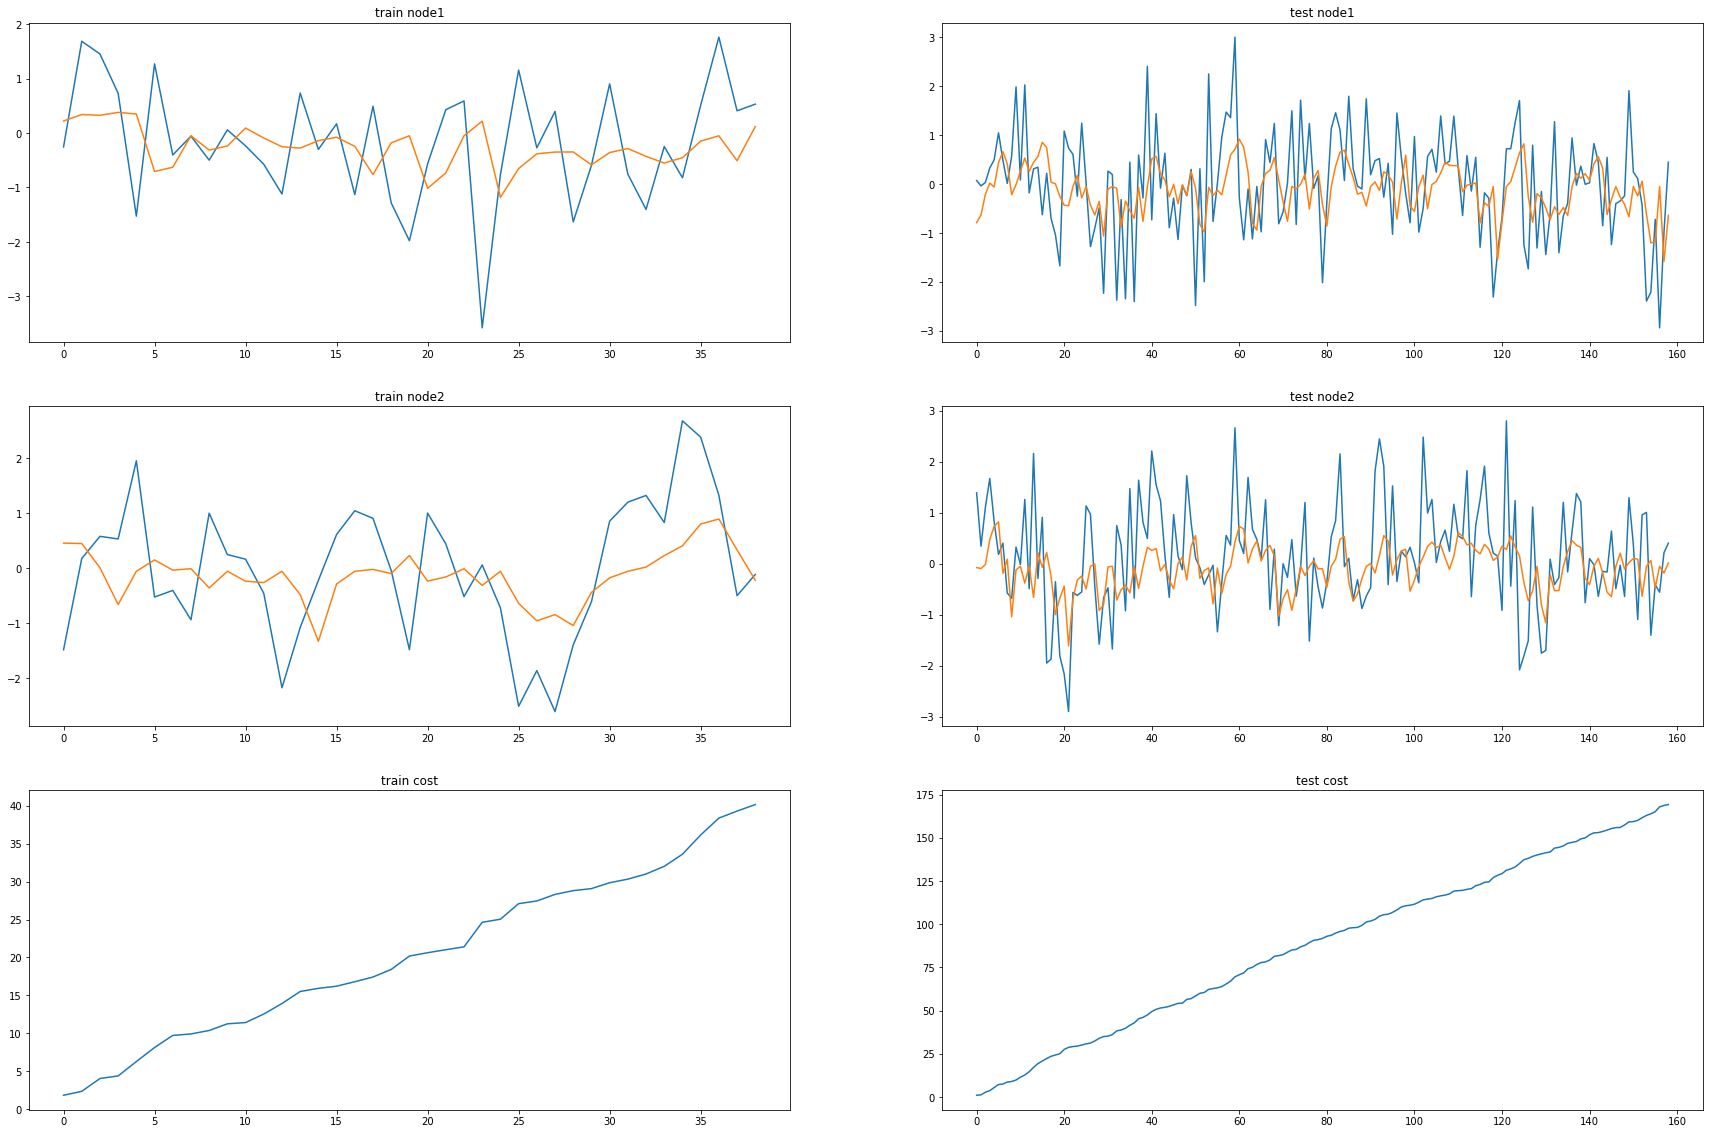

In [59]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset.targets[i][0] for i in range(train_dataset.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset.targets[i][0] for i in range(test_dataset.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset.targets[i][1] for i in range(train_dataset.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[1] for i in range(train_dataset.snapshot_count)]))


ax4.set_title('test node2')
ax4.plot([test_dataset.targets[i][1] for i in range(test_dataset.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[1] for i in range(test_dataset.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)

### Chickenpox Nodes = 4, Filters = 12

In [61]:
model1 = RecurrentGCN(node_features=4)

optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.01)

model1.train()

for epoch in tqdm(range(200)):
    cost = 0
    _b=[]
    _d=[]
    for time, snapshot in enumerate(train_dataset1):
        y_hat = model1(snapshot.x, snapshot.edge_index, snapshot.edge_attr).reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward(retain_graph=True)
    optimizer1.step()
    optimizer1.zero_grad()

100%|██████████| 200/200 [00:30<00:00,  6.58it/s]


In [63]:
model1.eval()
cost = 0
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset1):
    if time == 0:
        model1.recurrent.weight = None
    y_hat = model1(snapshot.x, snapshot.edge_index, snapshot.edge_attr).reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 0.9248


In [64]:
_e = [_d[i].detach() for i in range(len(_d))]

_c = [_a1[i].detach() for i in range(len(_a1))]

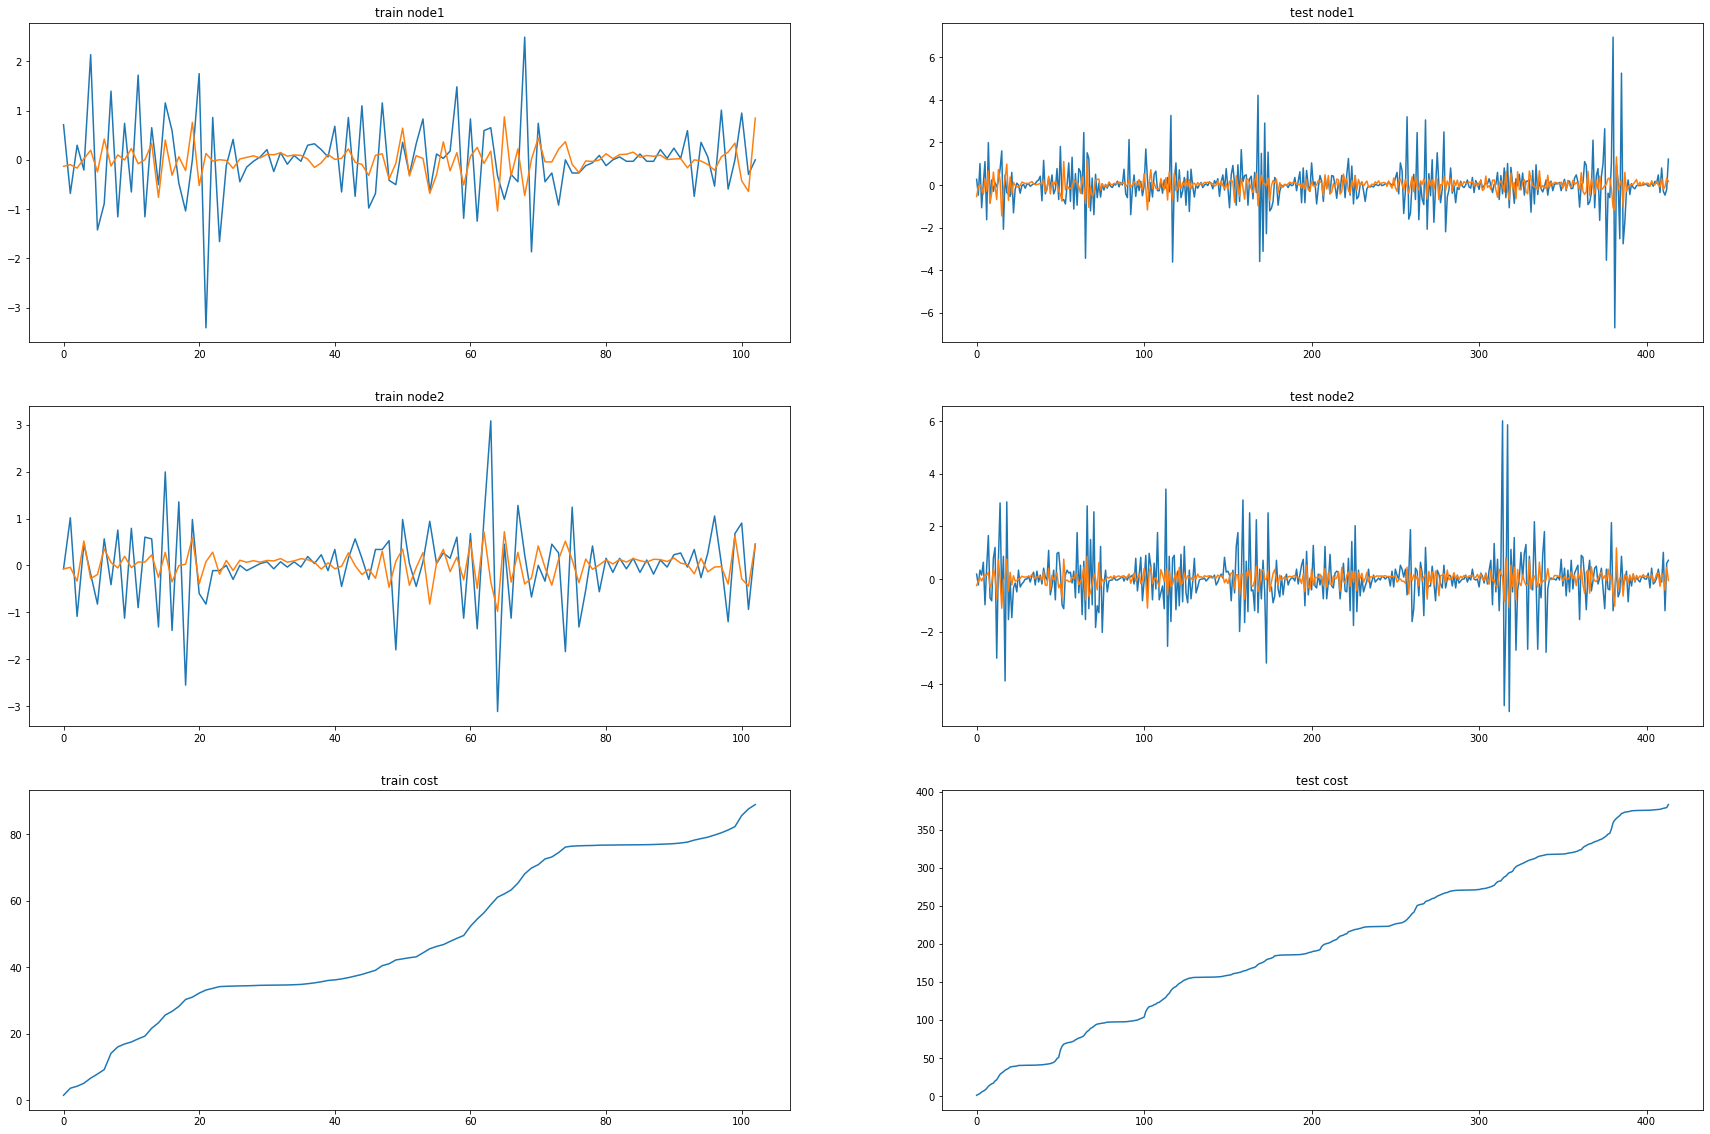

In [65]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset1.targets[i][0] for i in range(train_dataset1.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset1.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset1.targets[i][0] for i in range(test_dataset1.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset1.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset1.targets[i][1] for i in range(train_dataset1.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[1] for i in range(train_dataset1.snapshot_count)]))


ax4.set_title('test node2')
ax4.plot([test_dataset1.targets[i][1] for i in range(test_dataset1.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[1] for i in range(test_dataset1.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)

### Pedalme Nodes = 4, Filters = 

In [67]:
model2 = RecurrentGCN(node_features=4)

optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)

model2.train()
    

for epoch in tqdm(range(200)):
    cost = 0
    _b=[]
    _d=[]
    for time, snapshot in enumerate(train_dataset2):
        y_hat = model2(snapshot.x, snapshot.edge_index, snapshot.edge_attr).reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward(retain_graph=True)
    optimizer2.step()
    optimizer2.zero_grad()

100%|██████████| 200/200 [00:01<00:00, 101.86it/s]


In [68]:
model2.eval()
cost = 0
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset2):
    if time == 0:
        model2.recurrent.weight = None
    y_hat = model2(snapshot.x, snapshot.edge_index, snapshot.edge_attr).reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 0.5624


In [69]:
_e = [_d[i].detach() for i in range(len(_d))]

In [70]:
_c = [_a1[i].detach() for i in range(len(_a1))]

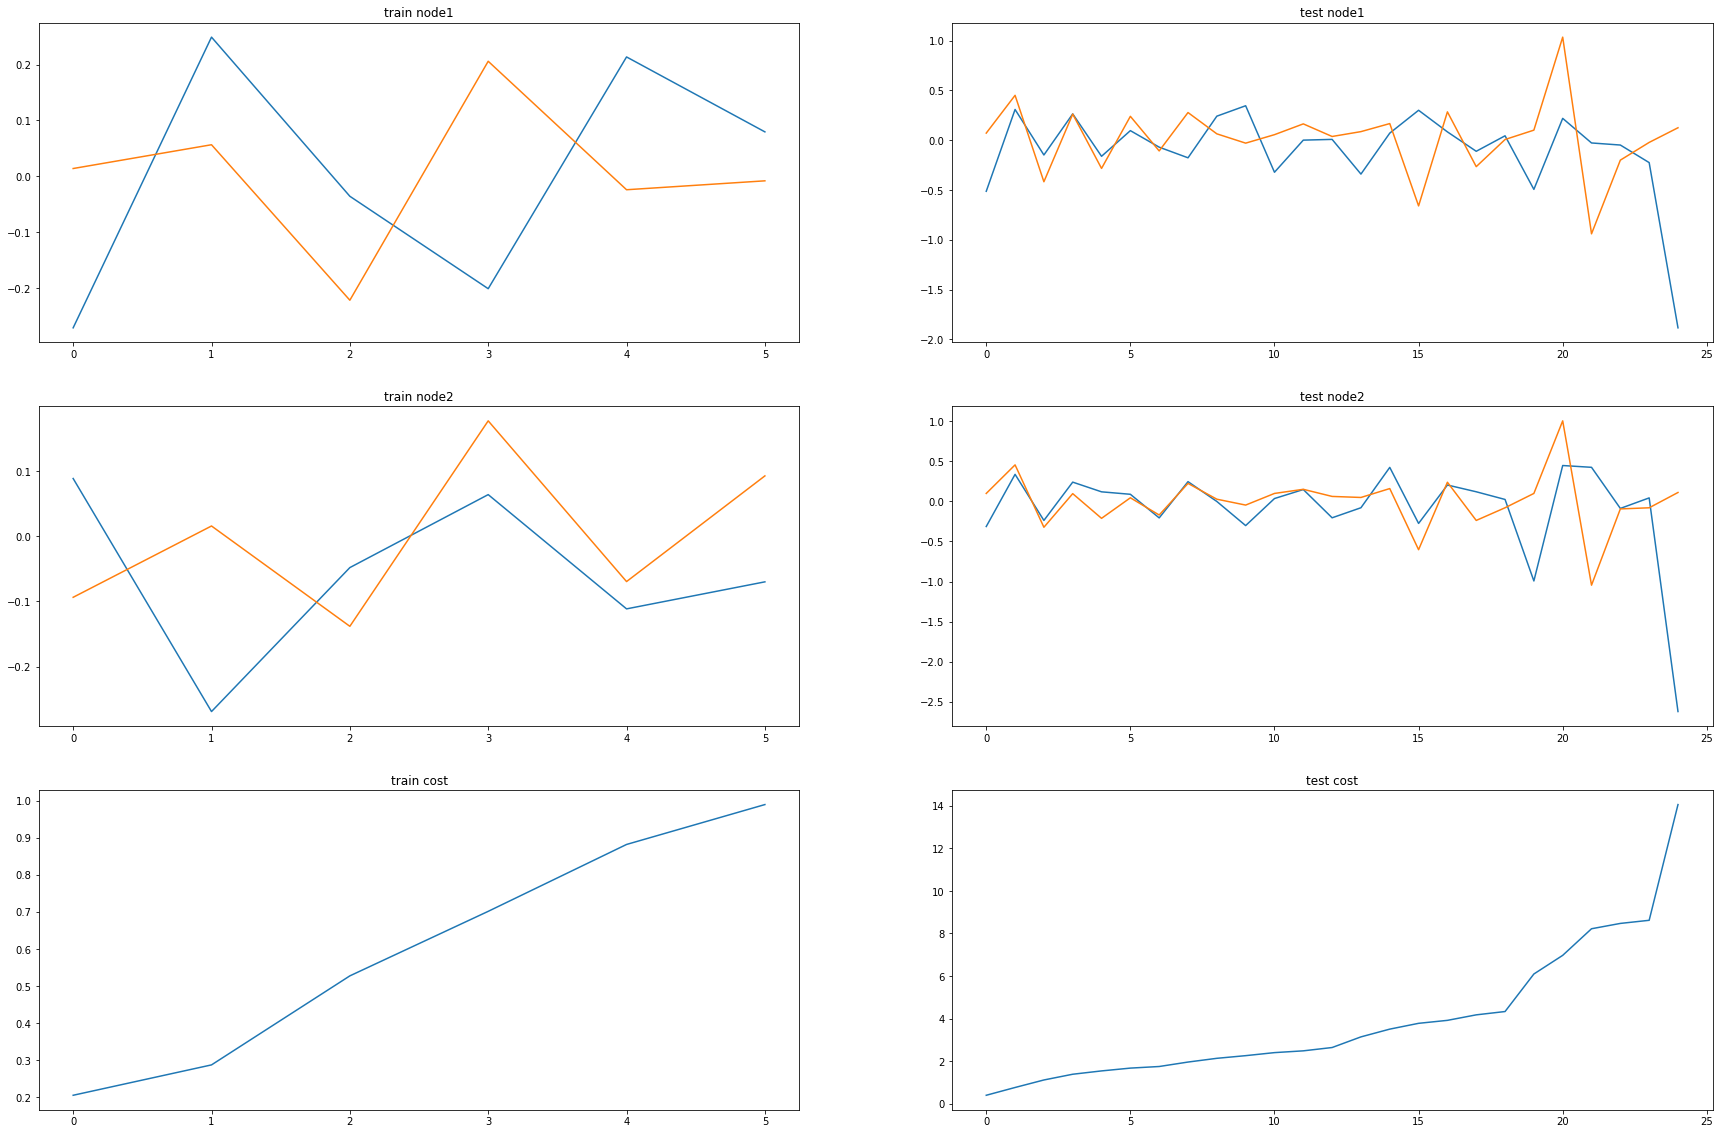

In [71]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset2.targets[i][0] for i in range(train_dataset2.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset2.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset2.targets[i][0] for i in range(test_dataset2.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset2.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset2.targets[i][1] for i in range(train_dataset2.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[1] for i in range(train_dataset2.snapshot_count)]))

ax4.set_title('test node2')
ax4.plot([test_dataset2.targets[i][1] for i in range(test_dataset2.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[1] for i in range(test_dataset2.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)

### Wikimaths Nodes = 8, Filters = 

In [73]:
model3 = RecurrentGCN(node_features=8)

optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.01)

model3.train()

for epoch in tqdm(range(50)):
    cost = 0
    _b=[]
    _d=[]
    for time, snapshot in enumerate(train_dataset3):
        y_hat = model3(snapshot.x, snapshot.edge_index, snapshot.edge_attr).reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward(retain_graph=True)
    optimizer3.step()
    optimizer3.zero_grad()

100%|██████████| 50/50 [02:50<00:00,  3.42s/it]


In [74]:
model3.eval()
cost = 0
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset3):
    if time == 0:
        model3.recurrent.weight = None
    y_hat = model3(snapshot.x, snapshot.edge_index, snapshot.edge_attr).reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 0.6972


In [75]:
_e = [_d[i].detach() for i in range(len(_d))]

In [76]:
_c = [_a1[i].detach() for i in range(len(_a1))]

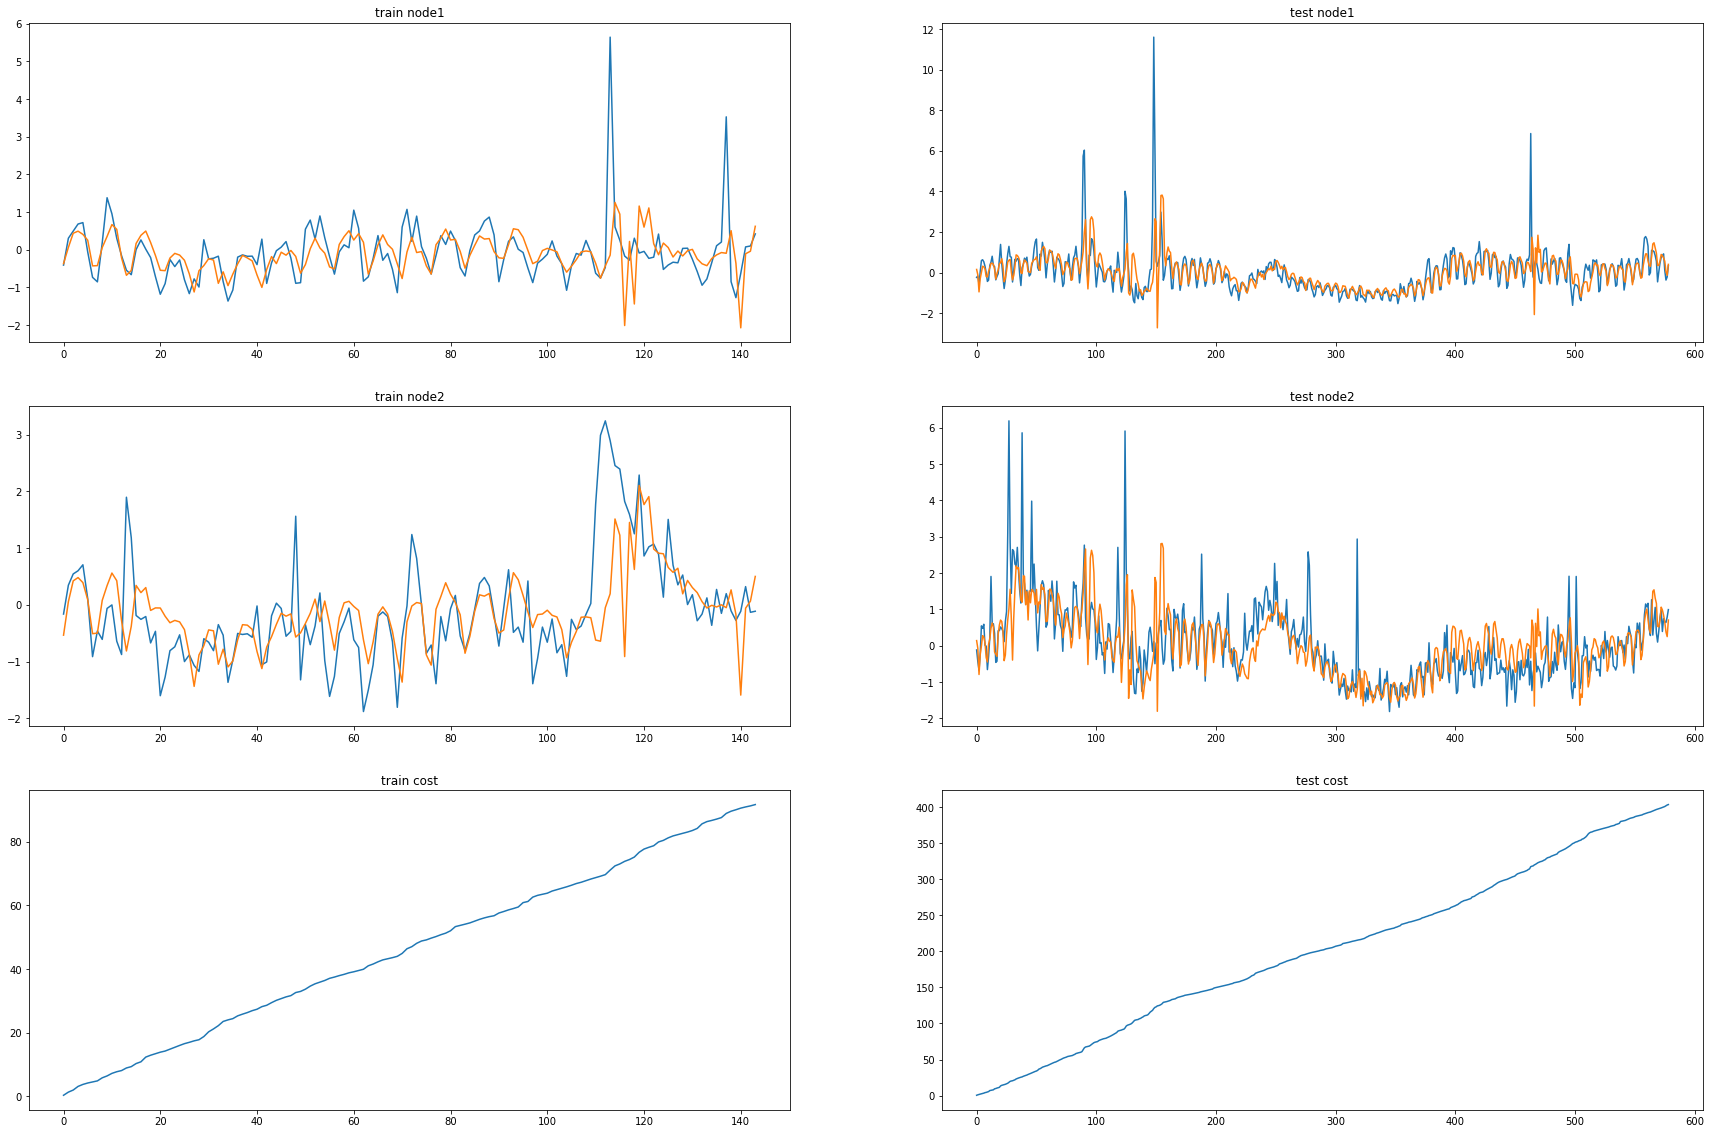

In [77]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset3.targets[i][0] for i in range(train_dataset3.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset3.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset3.targets[i][0] for i in range(test_dataset3.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset3.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset3.targets[i][1] for i in range(train_dataset3.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[1] for i in range(train_dataset3.snapshot_count)]))


ax4.set_title('test node2')
ax4.plot([test_dataset3.targets[i][1] for i in range(test_dataset3.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[1] for i in range(test_dataset3.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)

### Windmillsmall Nodes = 8, Filters = 

In [79]:
model6 = RecurrentGCN(node_features=8)

optimizer6 = torch.optim.Adam(model6.parameters(), lr=0.01)

model6.train()

for epoch in tqdm(range(10)):
    cost = 0
    _b=[]
    _d=[]
    for time, snapshot in enumerate(train_dataset6):
        y_hat = model6(snapshot.x, snapshot.edge_index, snapshot.edge_attr).reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward(retain_graph=True)
    optimizer6.step()
    optimizer6.zero_grad()

100%|██████████| 10/10 [00:49<00:00,  4.97s/it]


In [80]:
model6.eval()
cost = 0
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset6):
    if time == 0:
        model6.recurrent.weight = None
    y_hat = model6(snapshot.x, snapshot.edge_index, snapshot.edge_attr).reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 1.0098


In [81]:
_e = [_d[i].detach() for i in range(len(_d))]

In [82]:
_c = [_a1[i].detach() for i in range(len(_a1))]

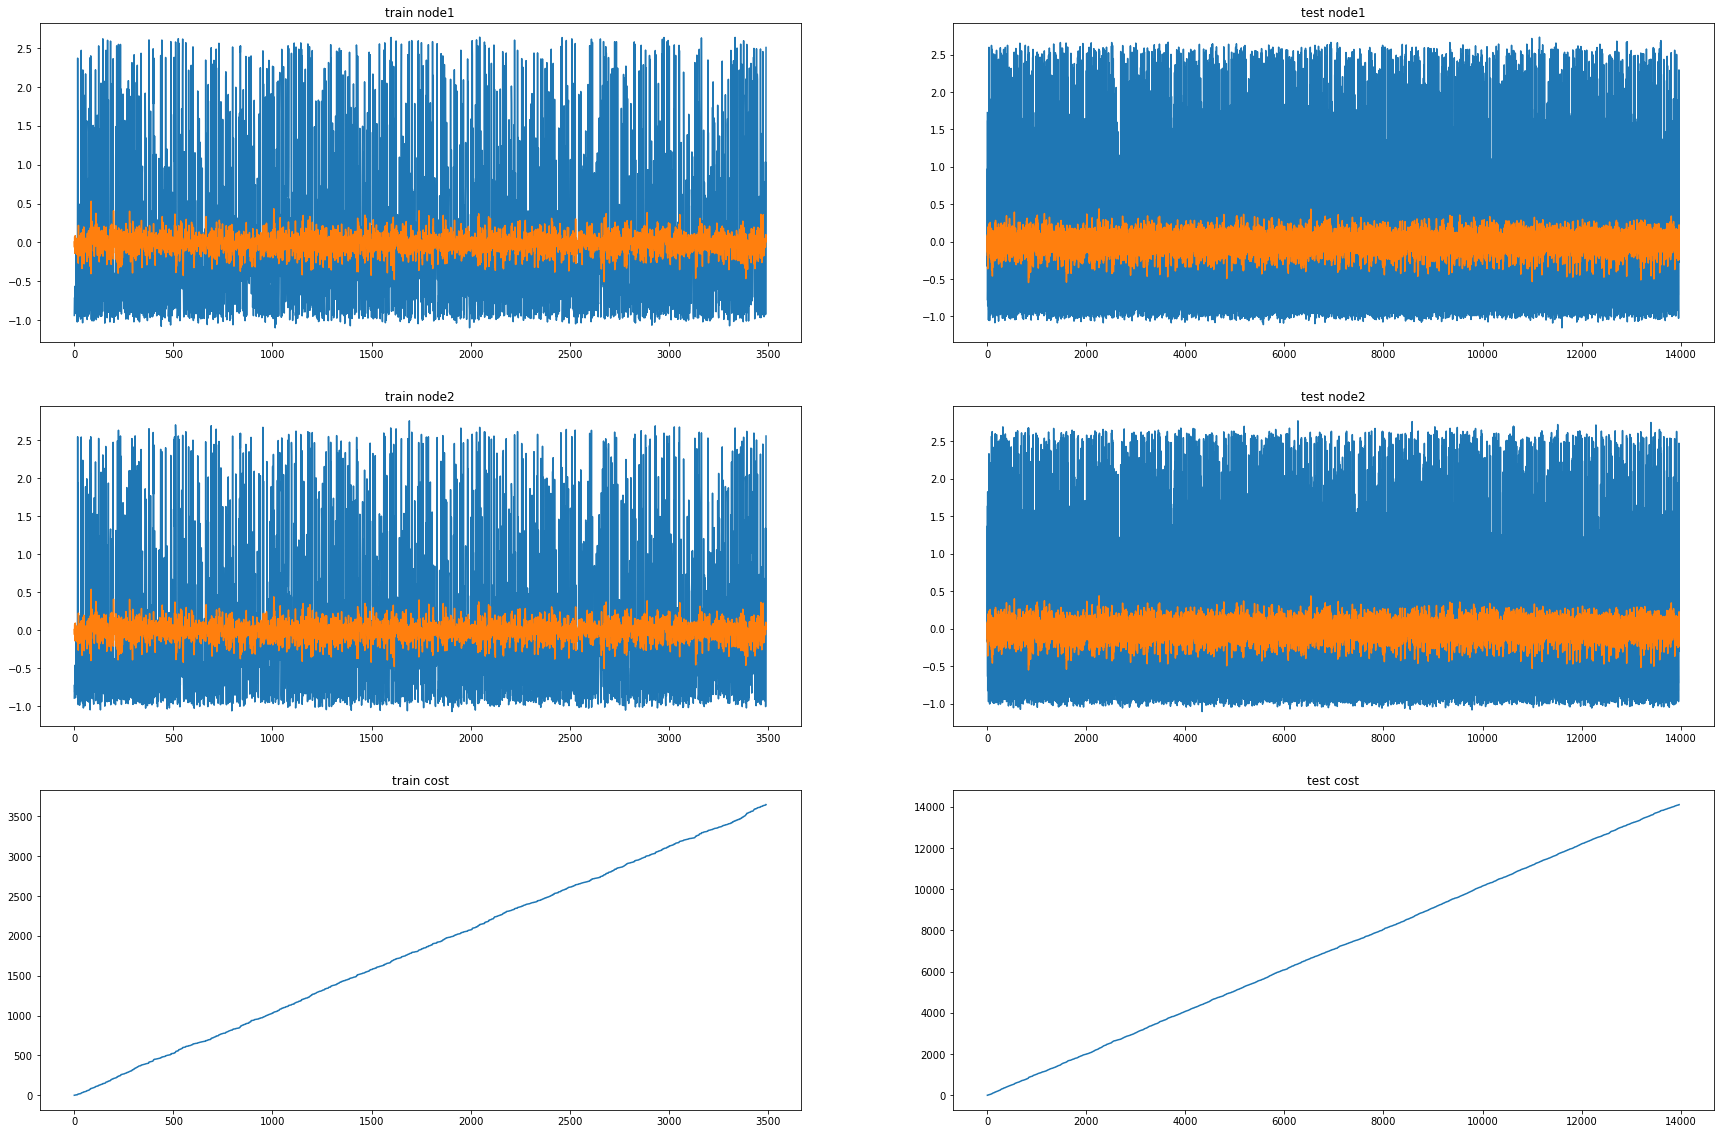

In [83]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset6.targets[i][0] for i in range(train_dataset6.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset6.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset6.targets[i][0] for i in range(test_dataset6.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset6.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset6.targets[i][1] for i in range(train_dataset6.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[1] for i in range(train_dataset6.snapshot_count)]))


ax4.set_title('test node2')
ax4.plot([test_dataset6.targets[i][1] for i in range(test_dataset6.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[1] for i in range(test_dataset6.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)

### Monte Nodes = 4, Filters = 

In [84]:
model10 = RecurrentGCN(node_features=4)

optimizer10 = torch.optim.Adam(model10.parameters(), lr=0.01)

model10.train()

for epoch in tqdm(range(200)):
    cost = 0
    _b=[]
    _d=[]
    for time, snapshot in enumerate(train_dataset10):
        y_hat = model10(snapshot.x, snapshot.edge_index, snapshot.edge_attr).reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward(retain_graph=True)
    optimizer10.step()
    optimizer10.zero_grad()

100%|██████████| 200/200 [01:38<00:00,  2.04it/s]


In [85]:
model10.eval()
cost = 0
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset10):
    if time == 0:
        model10.recurrent.weight = None
    y_hat = model10(snapshot.x, snapshot.edge_index, snapshot.edge_attr).reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 0.9850


In [86]:
_e = [_d[i].detach() for i in range(len(_d))]

_c = [_a1[i].detach() for i in range(len(_a1))]

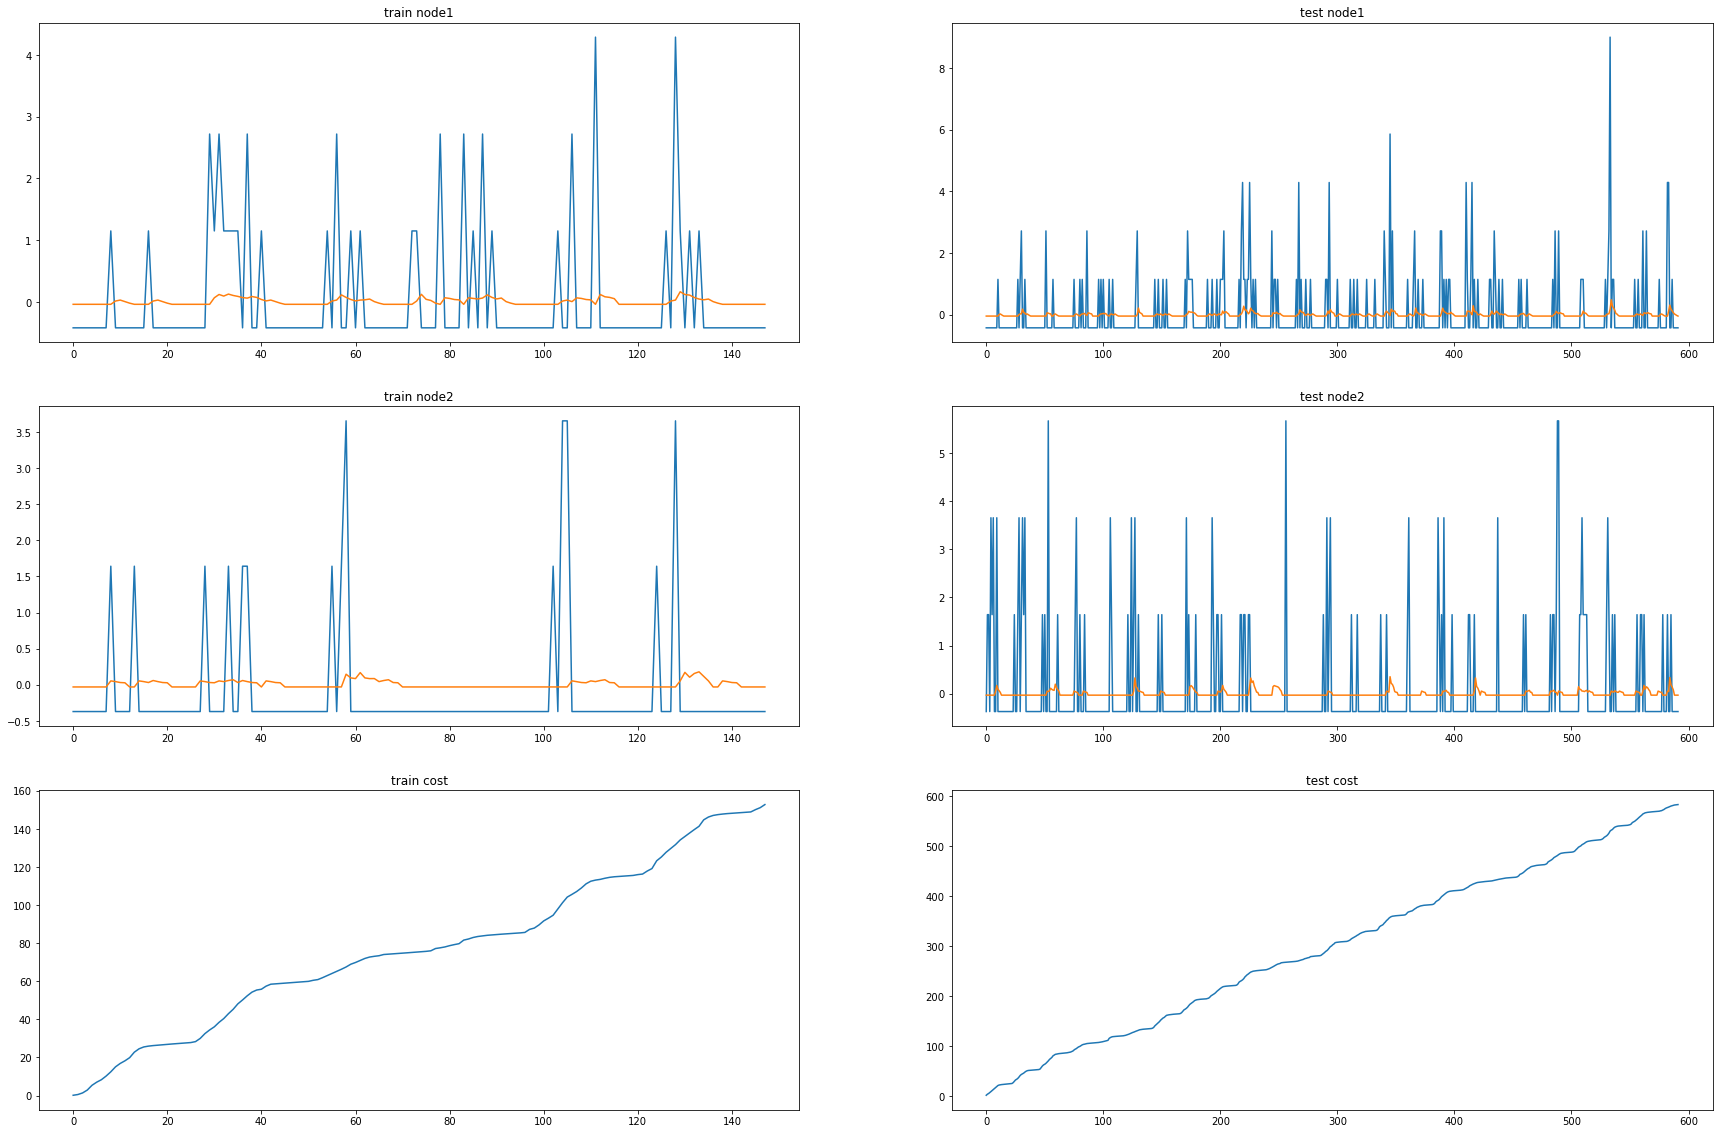

In [87]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset10.targets[i][0] for i in range(train_dataset10.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset10.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset10.targets[i][0] for i in range(test_dataset10.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset10.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset10.targets[i][10] for i in range(train_dataset10.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[10] for i in range(train_dataset10.snapshot_count)]))


ax4.set_title('test node2')
ax4.plot([test_dataset10.targets[i][10] for i in range(test_dataset10.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[10] for i in range(test_dataset10.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)